In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from bcg_code import *

from IPython.display import clear_output

In [2]:
experiments = []

Λ = np.load('matrices/outerliers20.npy')
d = len(Λ)
b = np.ones(d)/np.sqrt(d)

l = 10
experiments.append({'name':'outliers20', 'Λ':Λ, 'ts':np.arange(101,dtype='int'), 'reorth':True, 'l':l})

l = 100
experiments.append({'name':'outliers20', 'Λ':Λ, 'ts':np.arange(11,dtype='int'), 'reorth':True, 'l':l})


# synthetic example with decaying eigenvalues
Λ = np.load('matrices/fastdecay.npy')
d = len(Λ)
b = np.ones(d)/np.sqrt(d)

l = 10
experiments.append({'name':'fastdecay', 'Λ':Λ, 'ts':np.arange(81,dtype='int'), 'reorth':True, 'l':l})

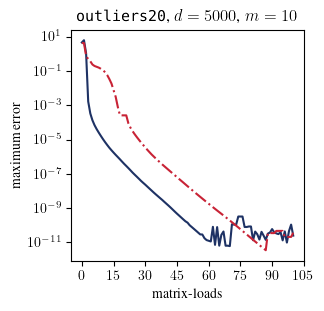

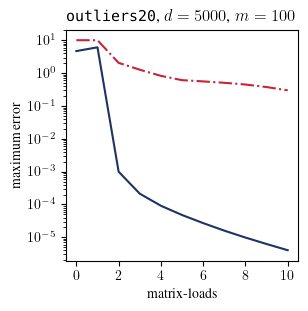

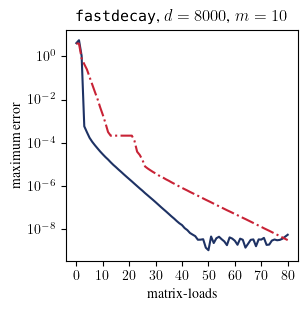

In [3]:
for experiment in experiments:

    name = experiment['name']
    Λ = experiment['Λ']
    ts = experiment['ts']
    reorth = experiment['reorth']
    l = experiment['l']

    d = len(Λ)
    A = sp.sparse.spdiags(Λ.reshape(1,d),[0])

    np.random.seed(0)
    B = np.random.randn(d,l)

    x_true = np.sqrt(Λ)[:,None]*B

    
    x_block = get_sqrt_sols(A,B,ts,reorth=reorth)

    err_block = np.full(len(ts),np.nan)
    for i,t in enumerate(ts):
        e = x_true-x_block[i]
        err_block[i] = np.max(np.linalg.norm(e,axis=0))

    x_singles = [get_sqrt_sols(A,B[:,j:j+1],ts,reorth=reorth) for j in range(l)]
    err_single = np.full(len(ts),np.nan)
    for i,t in enumerate(ts):
        e = [x_true[:,j] - x_singles[j][i].reshape(-1) for j in range(l)]
        err_single[i] = np.max(np.linalg.norm(e,axis=0))

    
    fig,ax = plt.subplots(1,1,figsize=(3,3))

    plt.plot(ts,err_block,ls='-',color=c1,label='block')
    plt.plot(ts,err_single,ls='-.',color=c2,label='single')
    plt.title(f'\\texttt{{{name}}}, $d={d}$, $m = {l}$')   
    plt.ylabel('maximum error')
    plt.xlabel(f'matrix-loads')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.yscale('log')

    plt.savefig(f"imgs/sqrt_iter_error_{name}_m{l}.pdf",bbox_inches='tight')

    # plt.close()